In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):
    a: float
    b: float
    c: float

    equation: str
    discriminant: float
    result: str

In [3]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x² + {state['b']}x + {state['c']} = 0"
    return {'equation': equation}

def calculate_discriminant(state: QuadState):
    d = state['b']**2 - 4 * state['a'] * state['c']
    return {'discriminant': d}

In [ ]:
def real_roots(state: QuadState):
    d = state['discriminant']
    root1 = (-state['b'] + d**0.5) / (2 * state['a'])
    root2 = (-state['b'] - d**0.5) / (2 * state['a'])
    result = f"Two real roots: {root1} and {root2}"
    return {'result': result}

def repeated_roots(state: QuadState):
    root = -state['b'] / (2 * state['a'])
    result = f"One repeated real root: {root}"
    return {'result': result}

def no_real_roots(state: QuadState):
    result = "No real roots"
    return {'result': result}

def check_condition(state: QuadState) -> Literal['real_roots', 'repeated_roots', 'no_real_roots']:
    d = state['discriminant']
    if d > 0:
        return 'real_roots'
    elif d == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

In [ ]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

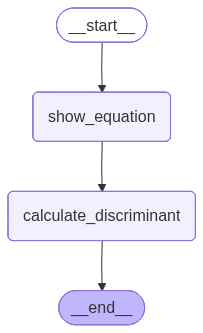

In [5]:
workflow

In [7]:
initial_state = {'a': 1, 'b': -3, 'c': 2}
result = workflow.invoke(initial_state)
result

{'a': 1, 'b': -3, 'c': 2, 'equation': '1x² + -3x + 2 = 0', 'discriminant': 1}